In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
dataset.shape

(5820, 33)

(array([ 775.,    0.,    0.,    0.,    0., 1444.,    0.,    0.,    0.,
        3601.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

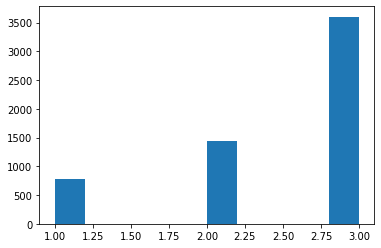

In [4]:
plt.hist(dataset.iloc[:,0])

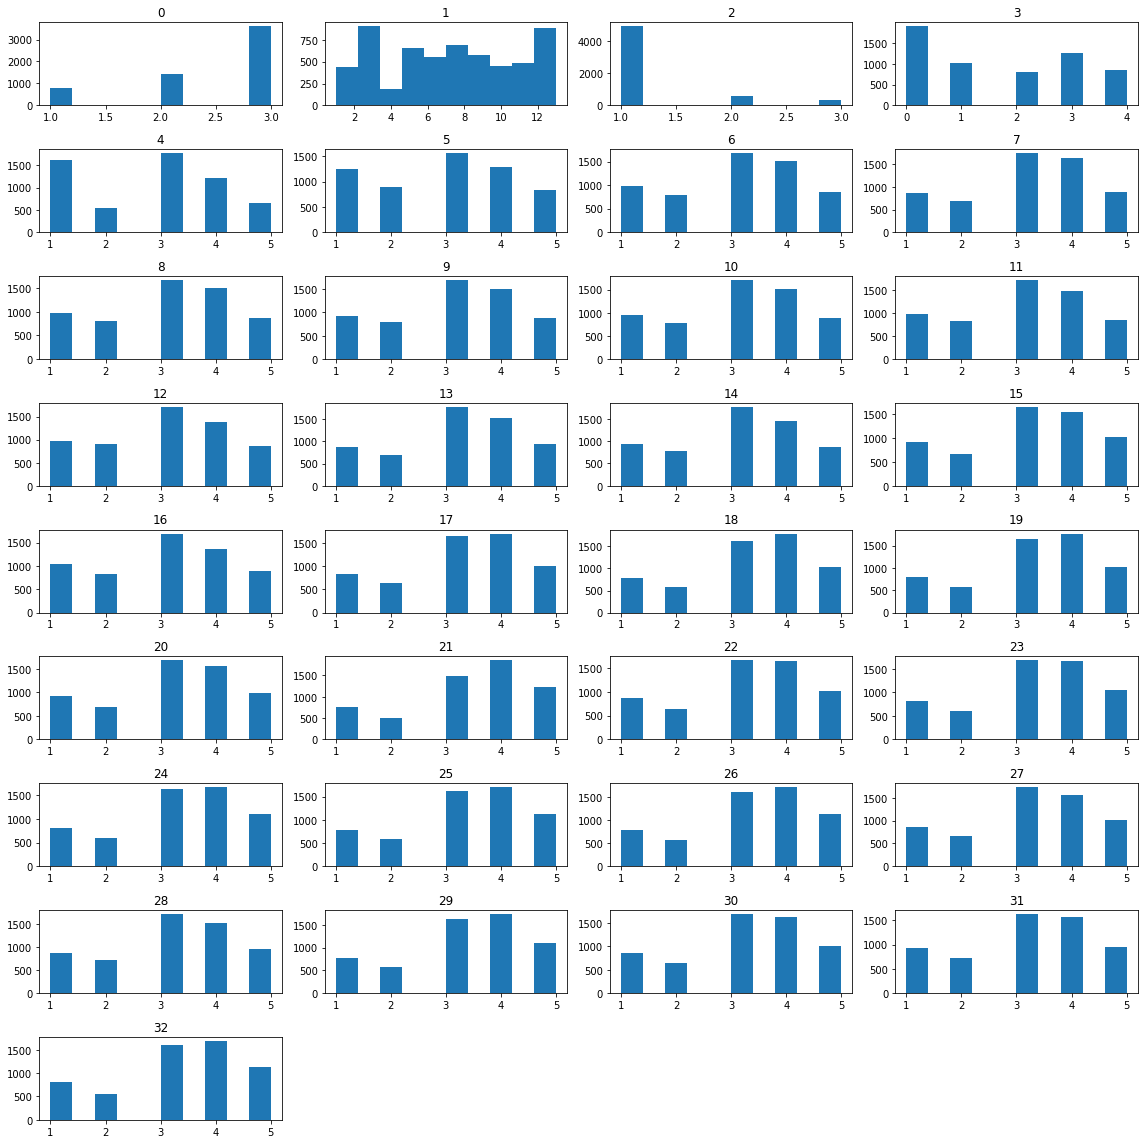

In [5]:
fig = plt.figure(figsize=(16,16))
i = 1;
for ax in range(0,33):
    plt.subplot(9,4,i)
    i=i+1;
    plt.hist(dataset.iloc[:,ax])
    plt.title(ax)
plt.tight_layout()

In [20]:
#preparation of data
X = dataset.iloc[:,:].values
X

array([[ 1,  2,  1, ...,  3,  3,  3],
       [ 1,  2,  1, ...,  3,  3,  3],
       [ 1,  2,  1, ...,  5,  5,  5],
       ...,
       [ 3, 13,  1, ...,  5,  5,  5],
       [ 3, 13,  1, ...,  1,  1,  1],
       [ 3, 13,  1, ...,  1,  1,  1]], dtype=int64)

In [21]:
from sklearn.cluster import KMeans

In [22]:
wcss = []

In [23]:
for cluster in np.arange(1,11):
    model = KMeans(cluster)
    model.fit(X)
    wcss.append(model.inertia_)

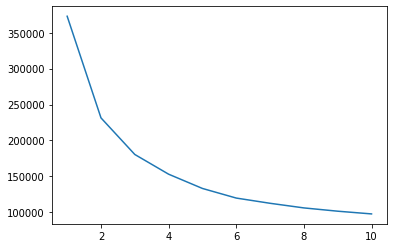

In [24]:
plt.plot(range(1,11),wcss,'-')

In [25]:
#therefore required clusters are 3
model = KMeans(n_clusters=3)
model.fit(X)
pred = model.predict(X)

In [26]:
pred

array([2, 2, 1, ..., 1, 0, 0])

(array([1234.,    0.,    0.,    0.,    0., 2228.,    0.,    0.,    0.,
        2358.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

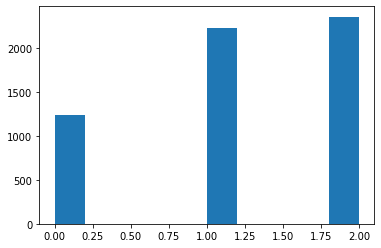

In [27]:
plt.hist(pred)

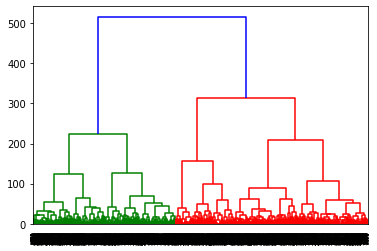

In [28]:
#hierarchical clustering (time consuming)

#1 dendograms
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [15]:
#best jump when clusters are 3

In [16]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=3)

In [17]:
pred2 = model2.fit_predict(X)

(array([2482.,    0.,    0.,    0.,    0., 2315.,    0.,    0.,    0.,
        1023.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

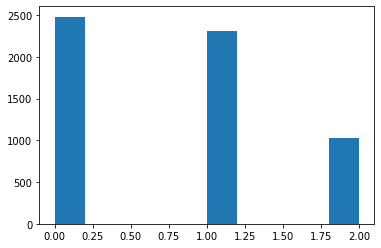

In [18]:
plt.hist(pred2)